In [1]:
%pylab inline
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
# if xarray doesn't work, may need to upgrade it 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [60]:
class UHI_Graphs: 
    def __init__(self, Folder, FileName):
        self.Folder = Folder 
        self.FileName = FileName 
    
    def Open(self):
        nc = xr.open_dataset('D:\yello\Documents\Lab_UIUC' + "\\" + self.Folder + "\\" + self.FileName)
        print(nc)
        return nc
    
    def Graph(self, nc, variable, cmap='bwr', UHI=False, letter='', save=False): 
        fig, axes = plt.subplots(figsize=(20,10))

        ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180.))
        ax.set_global()
        
        if UHI == True: 
            var = input("Variable?")
            urban_var = var + '_U'
            rural_var = var + '_R'
            plot_var = nc[urban_var] - nc[rural_var]
        else:
            plot_var = variable
        
        plot_var = plot_var.squeeze()
        plot_var.plot(transform=ccrs.PlateCarree(), cmap=cmap, levels=20)
        
        title = input("Title?")
        additional_notes = input("Additional Notes?")
        plt.title(title + '\n' + additional_notes, fontsize=20)
        ax.coastlines()
        
        date = input("Date?")

        #plt.colorbar(fraction=0.046, pad=0.04)
        if save == True:
            plt.savefig('D:\yello\Documents\Lab_UIUC' + "\\" + self.Folder + "\\" + variable + '_' + date + letter)
        

In [61]:
# initiate class
TSA_UHI = UHI_Graphs('Practice_3.8.2020', 'clm50_cesm201R_1deg_GSWP3V1_GHSL_SELECT_2000.clm2.h0.2010-01.nc')

In [62]:
# import file as an xarray dataset 
nc = TSA_UHI.Open()

<xarray.Dataset>
Dimensions:                 (cft: 2, glc_nec: 10, hist_interval: 2, lat: 192, levdcmp: 1, levgrnd: 25, levlak: 10, levsoi: 20, lon: 288, ltype: 9, natpft: 15, nvegwcs: 4, time: 1)
Coordinates:
  * levgrnd                 (levgrnd) float32 0.01 0.04 ... 28.870724 41.998436
  * levlak                  (levlak) float32 0.05 0.6 2.1 ... 25.6 34.325 44.775
  * levdcmp                 (levdcmp) float32 1.0
  * time                    (time) object 2010-02-01 00:00:00
  * lon                     (lon) float32 0.0 1.25 2.5 ... 356.25 357.5 358.75
  * lat                     (lat) float32 -90.0 -89.057594 ... 89.057594 90.0
Dimensions without coordinates: cft, glc_nec, hist_interval, levsoi, ltype, natpft, nvegwcs
Data variables:
    mcdate                  (time) int32 ...
    mcsec                   (time) int32 ...
    mdcur                   (time) int32 ...
    mscur                   (time) int32 ...
    nstep                   (time) int32 ...
    time_bounds            

Variable?TSA
Title?Hahahaha
Additional Notes?Nooo
Date?012010


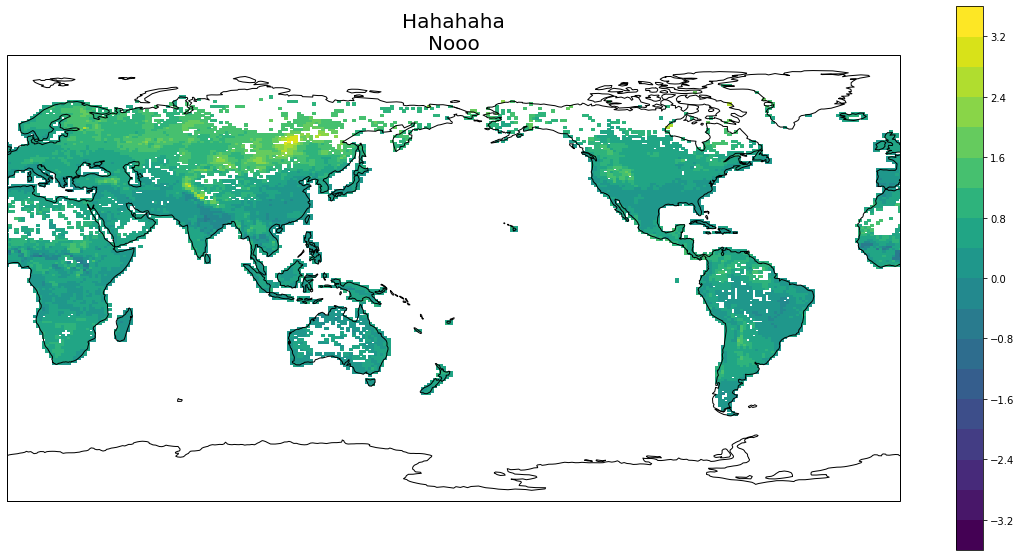

In [63]:
# make graph 
# save = True if want to save 
# letter is added on to the end of the file name to differentiate 
# if UHI true will calculate UHI for given variable 
UHI_Graphs.Graph(TSA_UHI, nc, 'TSA_UHI', UHI=True, cmap='viridis', letter = 'c', save = False)

In [ ]:
## combine daily max and daily min graphs into one, make colorbar the same scale 
## ^ check units 

## relative humidity 
## wet bulb temperature 
## difference between TSA and WBT = potential for temperature reduction 
